### Project: Ensemble Techniques - Term Deposit Subscription Prediction

Goal: Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


## Deliverable –1 (Exploratory data quality report reflecting the following)–(20)

1.Univariate analysis(12marks)
a.Univariate analysis –data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b.Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c.Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

#### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
sns.set(color_codes=True) # adds a nice background to the graphs

### Univariate analysis (12 marks)

In [3]:
bankdata = pd.read_csv('bank-full.csv')
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bankdata.shape
# get the number of rows and columns of the dataset

(45211, 17)

In [5]:
#bankdata.isnull().sum() #check for null Values
bankdata.isnull().values.any() #Check if there is any null entry in the data; the answer is no

False

In [6]:
bankdata[bankdata['Target'] == 'no'].shape[0]
#count of people having Target no, Most of the customer has zero

39922

In [7]:
39922/45211

0.8830151954170445

In [8]:
bankdata.describe().transpose()
#get descriptive statistics of the numerical variables

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
bankdata.select_dtypes(include=['object']).describe() # Describe non-numerical variables.

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
unique = pd.DataFrame(bankdata.nunique())
unique.columns = ['cnt_unique_values']
unique.T
#Table list the number of unique values of each parameter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
cnt_unique_values,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2


In [11]:
bankdata.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [12]:
bankdata['job'].unique()
#Display the unique values of parameter "job"

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
bankdata['marital'].unique()
#Display the unique values of parameter "marital", there are three marrital status

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
bankdata['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [15]:
bankdata['loan'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
bankdata['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
bankdata['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
bankdata['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [19]:
bankdata['Target'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
#bankdata['pdays'].mean()
#pd.to_numeric(bankdata['pdays'], errors='coerce').notnull().all()
#bankdata['pdays'].replace(-1,np.nan);
#bankdata['pdays'].fillna((bankdata['pdays'].mean()), inplace=True)
#bankdata.mean()

In [21]:
bankdata['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

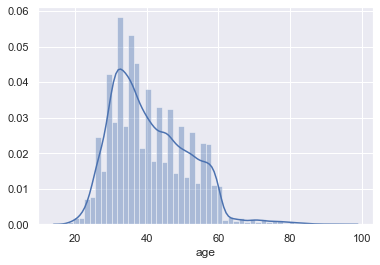

In [22]:
sns.distplot(bankdata['age']);

In [23]:
bankdata[(bankdata.pdays == -1)].pdays.count()
#count the number of records with "pdays" equals -1

36954

In [24]:
bankdata[(bankdata.previous == 0)].pdays.count()
#count the number of records with "previous" equals 0
#Obvious pdays are assigned -1 if previous equals 0, these are customers without previous 
#marketing information

36954

In [25]:
36954/len(bankdata.pdays)
#81.7% of customer has not been contacted by marketing for 900 days or never been contacted

0.8173674548229414

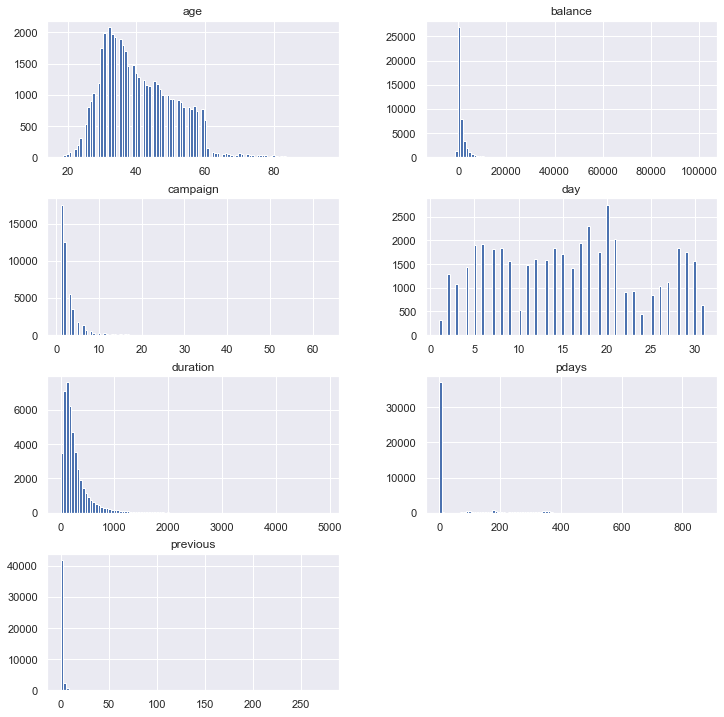

In [26]:
columns = list(bankdata)[:] # get all the colomn names 
bankdata[columns].hist(stacked=False, bins=100, figsize=(12,45), layout=(14,2));
#plot histograms of each column with numerical values

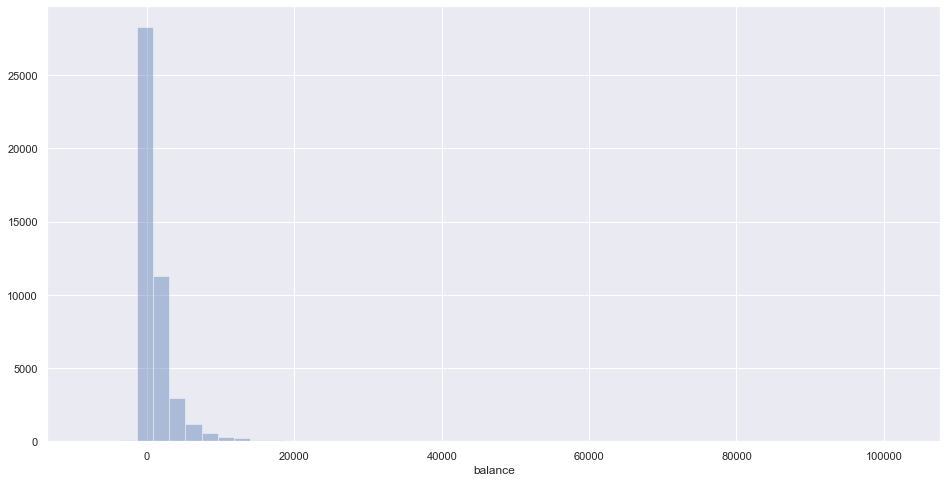

In [27]:
plt.figure(figsize=(16,8))
sns.distplot(bankdata['balance'],kde=0);

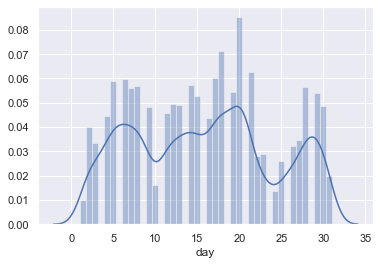

In [28]:
sns.distplot(bankdata['day']);

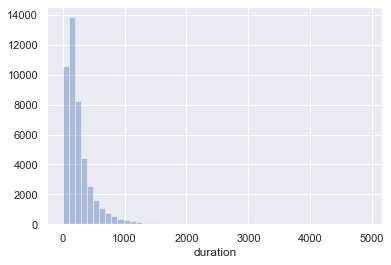

In [29]:
sns.distplot(bankdata['duration'],kde=0);

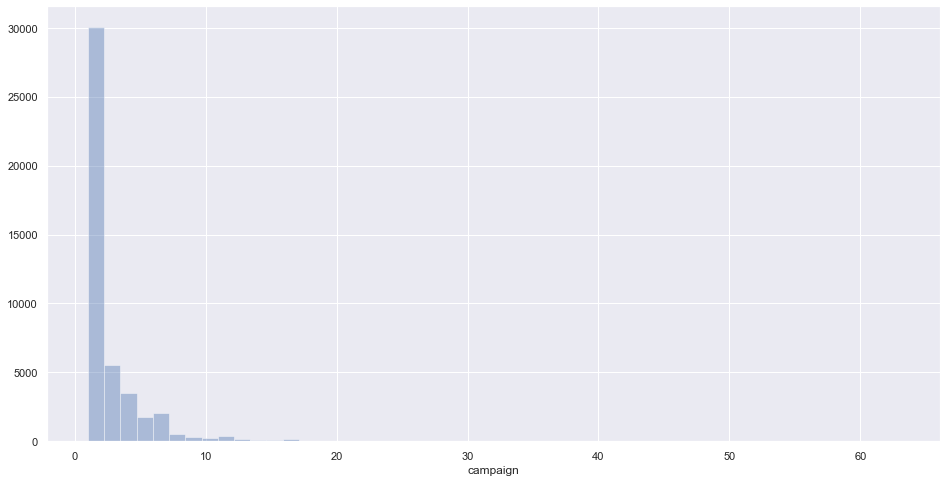

In [30]:
plt.figure(figsize=(16,8))
sns.distplot(bankdata['campaign'],kde=0);

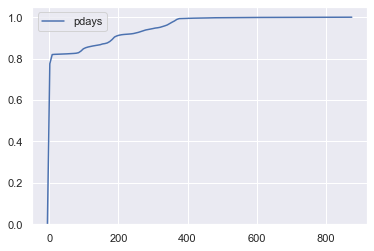

In [31]:
sns.kdeplot(bankdata['pdays'], cumulative=True, bw=1.5);
#sns.distplot(bankdata['pdays']);

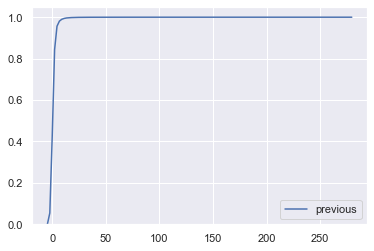

In [32]:
sns.kdeplot(bankdata['previous'], cumulative=True, bw=1.5)

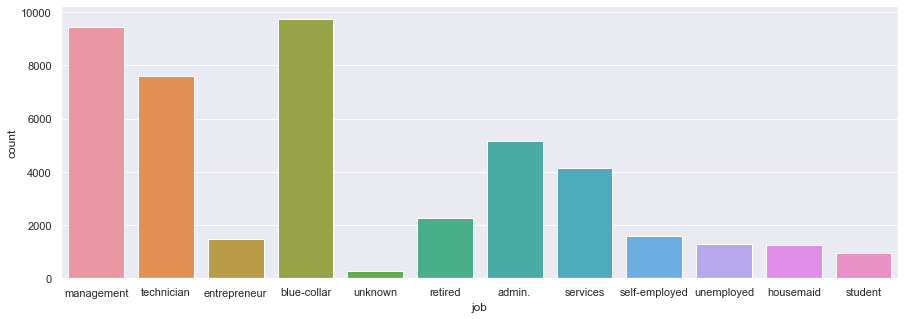

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(bankdata['job']);

In [34]:
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


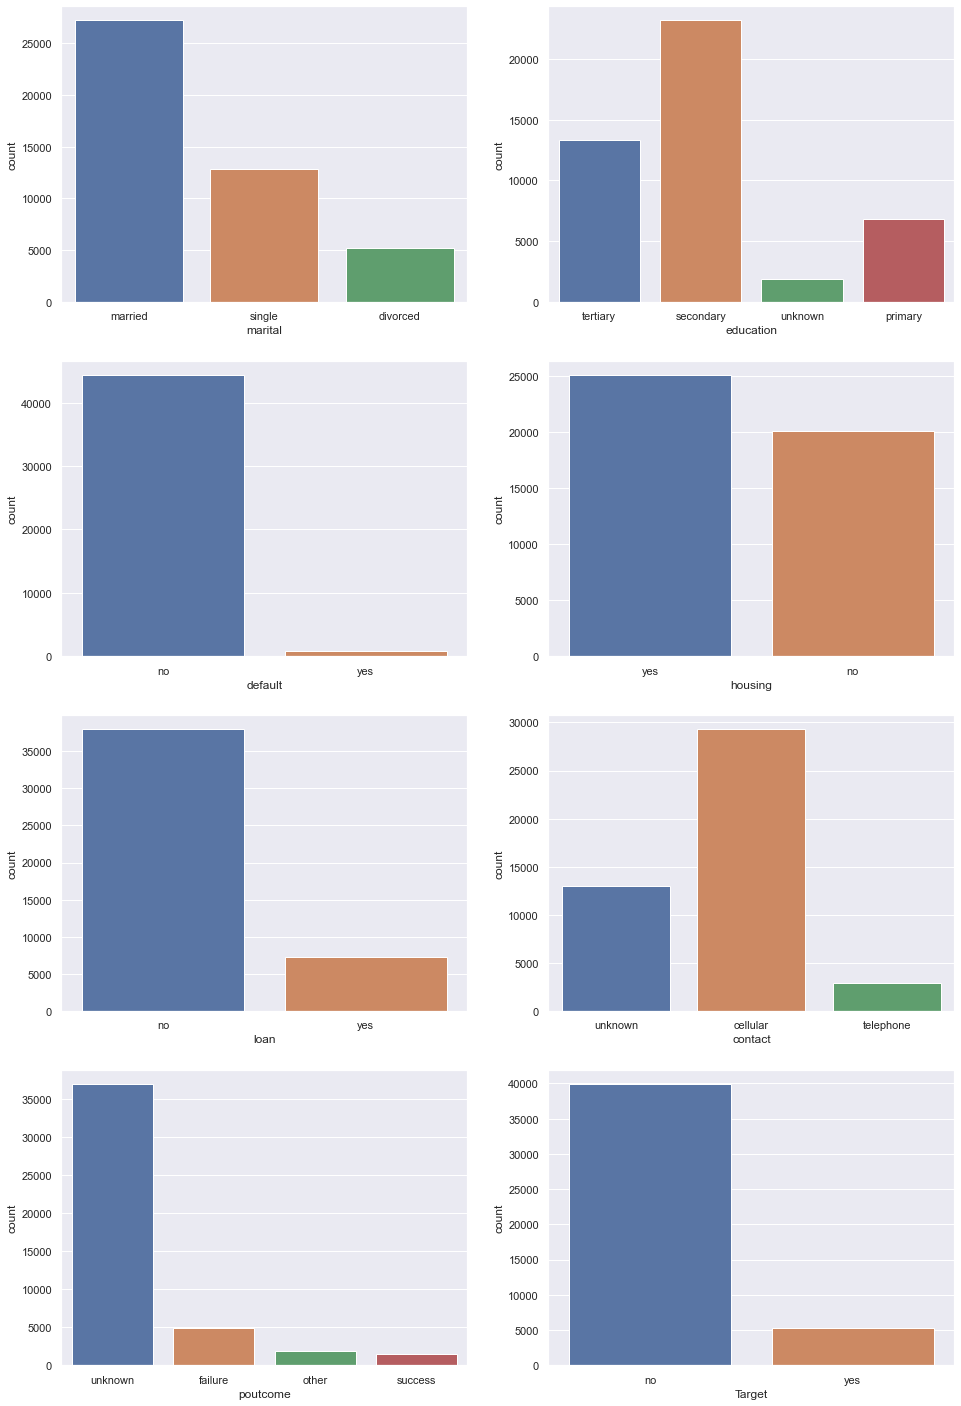

In [35]:
fig, ax =plt.subplots(4,2,figsize=(16,25))
sns.countplot(bankdata['marital'], ax=ax[0,0]);
sns.countplot(bankdata['education'], ax=ax[0,1]);
sns.countplot(bankdata['default'], ax=ax[1,0]);
sns.countplot(bankdata['housing'], ax=ax[1,1]);
sns.countplot(bankdata['loan'], ax=ax[2,0]);
sns.countplot(bankdata['contact'], ax=ax[2,1]);
sns.countplot(bankdata['poutcome'], ax=ax[3,0]);
sns.countplot(bankdata['Target'], ax=ax[3,1]);
plt.rcParams["axes.labelsize"] = 20
fig.show()

In [36]:
ItemCount = bankdata.groupby('Target').mean()[['age']]
ItemCount
#Take a look at the average age of clients for Target equals 0 and 1 

,age
Target,
no,40.838986
yes,41.670070


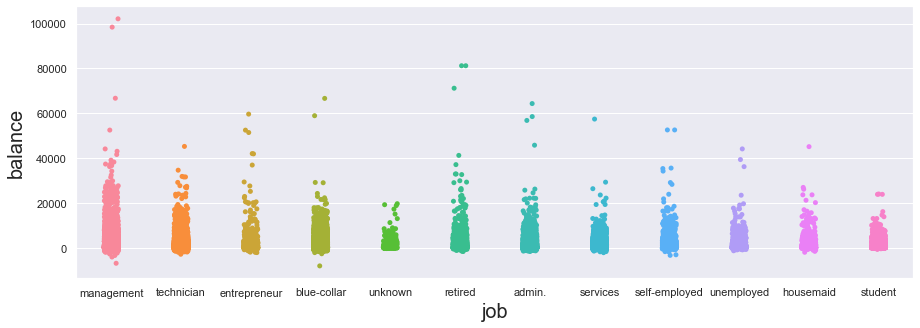

In [37]:
plt.figure(figsize=(15,5))
sns.stripplot(bankdata['job'], bankdata['balance'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


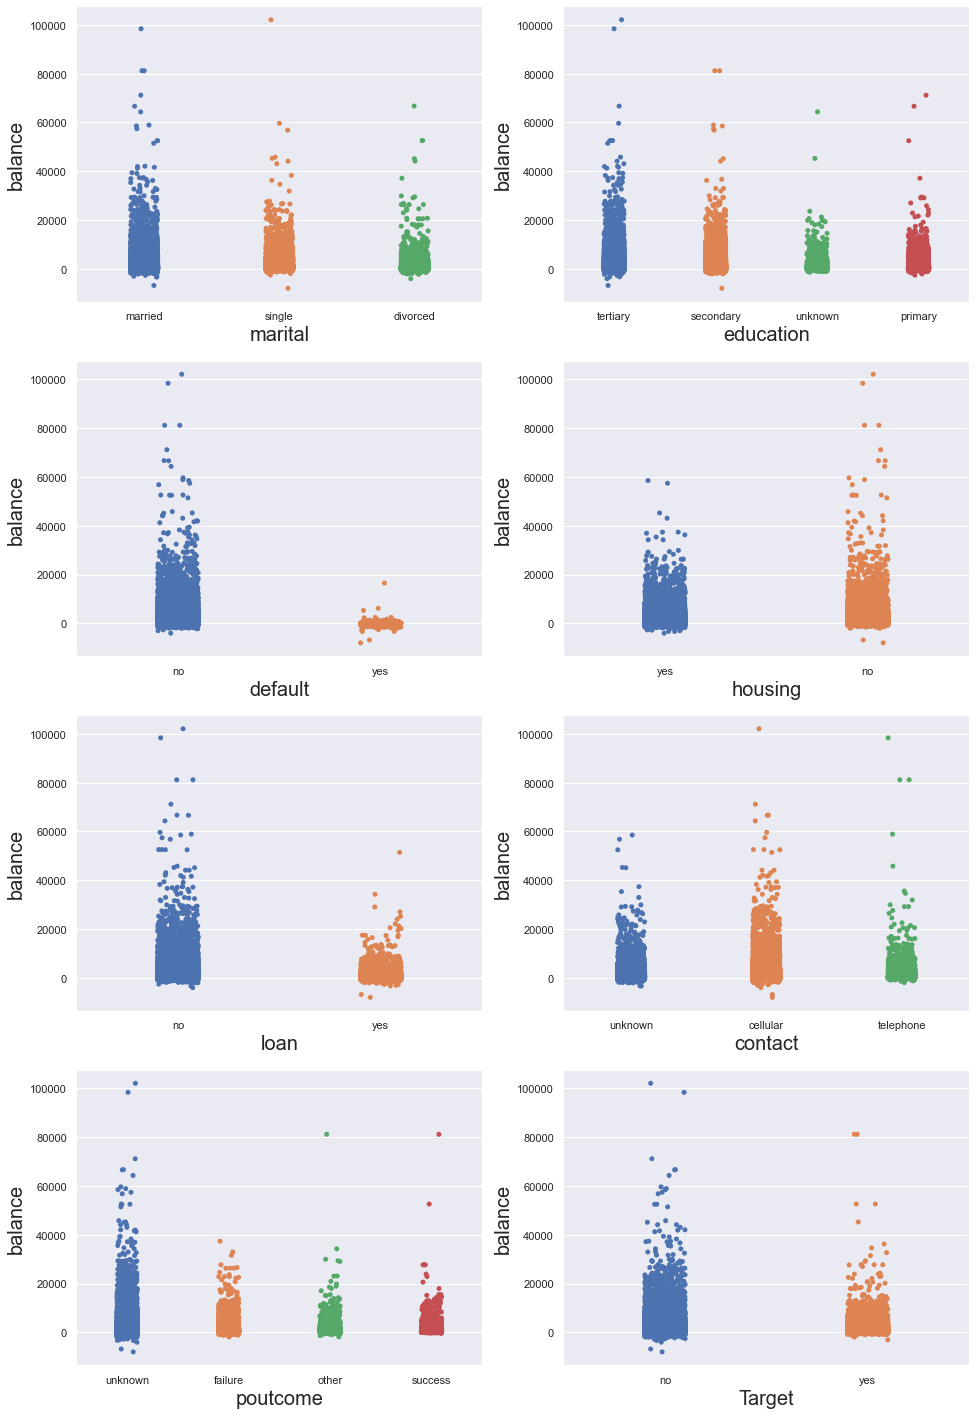

In [38]:
fig, ax =plt.subplots(4,2,figsize=(16,25))
sns.stripplot(bankdata['marital'], bankdata['balance'], ax=ax[0,0])
sns.stripplot(bankdata['education'], bankdata['balance'], ax=ax[0,1]);
sns.stripplot(bankdata['default'], bankdata['balance'], ax=ax[1,0]);
sns.stripplot(bankdata['housing'], bankdata['balance'], ax=ax[1,1]);
sns.stripplot(bankdata['loan'], bankdata['balance'], ax=ax[2,0]);
sns.stripplot(bankdata['contact'], bankdata['balance'], ax=ax[2,1]);
sns.stripplot(bankdata['poutcome'], bankdata['balance'], ax=ax[3,0]);
sns.stripplot(bankdata['Target'], bankdata['balance'], ax=ax[3,1]);
plt.rcParams["axes.labelsize"] = 20
fig.show()

### Multivariate analysis (8 marks)

In [39]:
bankdata.corr() # It will show correlation matrix, no significant correlation is observed except for previous and pdays 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


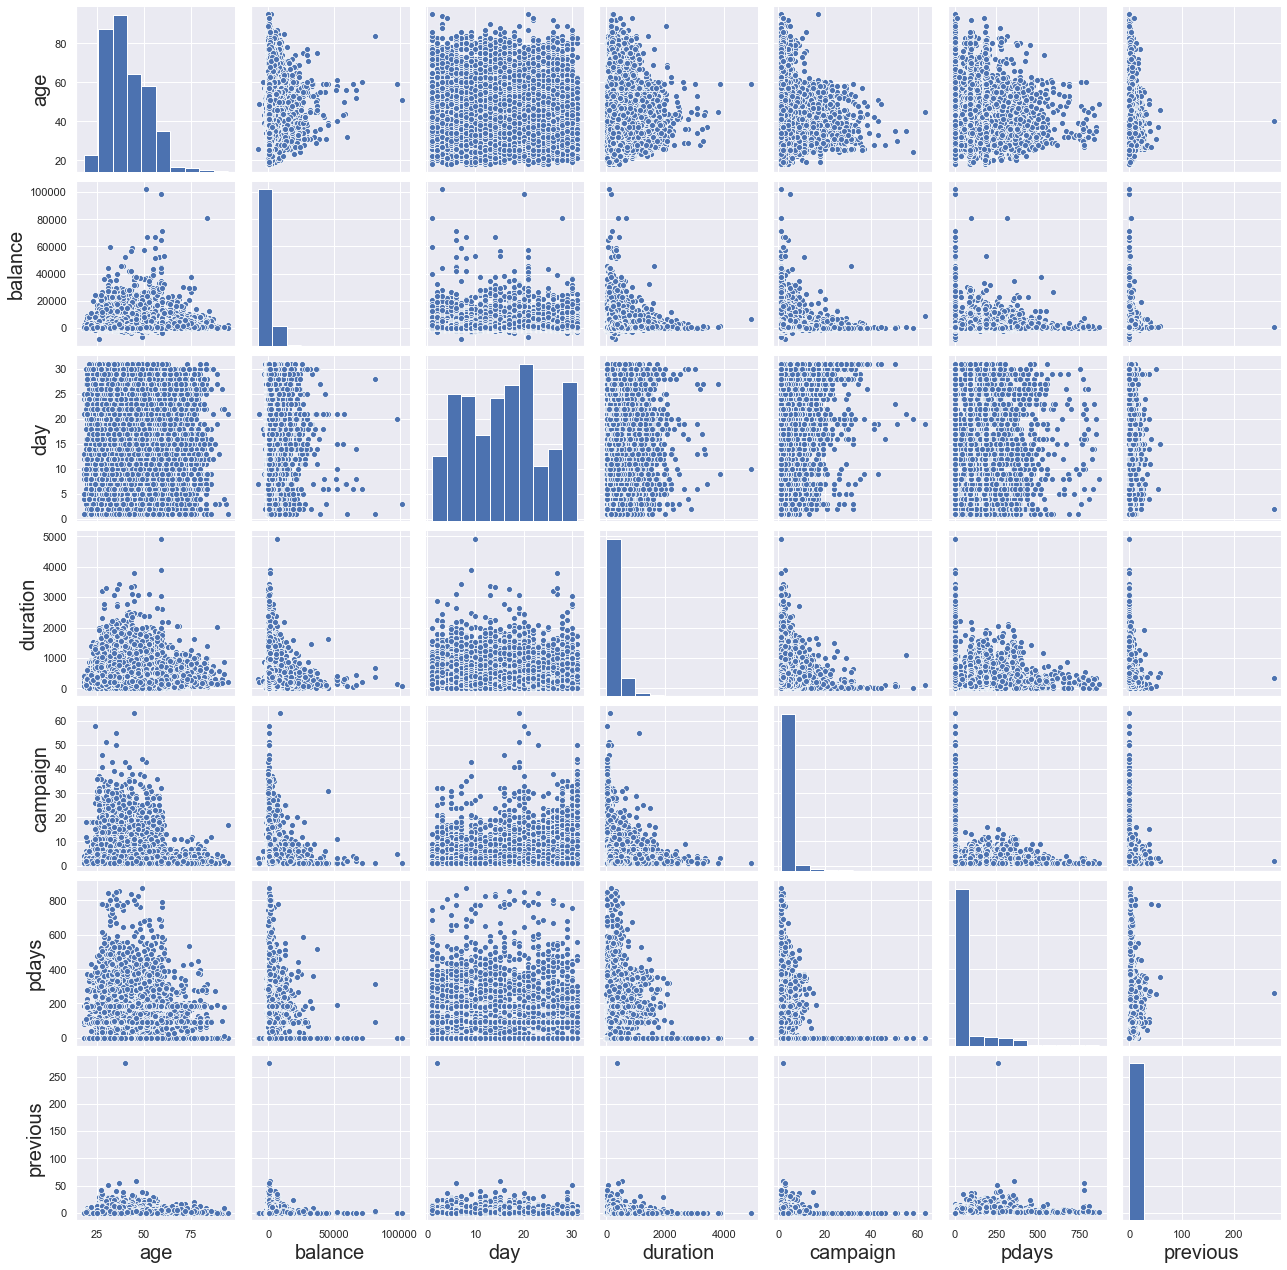

In [40]:
sns.pairplot(bankdata);

#### Deliverable – 2 (Prepare the data for analytics) – (10)

In [41]:
#from sklearn.impute import SimpleImputer
#rep_0 = SimpleImputer(missing_values=-1, strategy="mean")
#cols=['pdays']
#imputer = rep_0.fit(bankdata[cols])
#bankdata[cols] = imputer.transform(bankdata[cols])
#bankdata.head(10)
#Replace all the -1 in pdays with the average value

In [42]:
bankdata.info()
# many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [43]:
#Convert the columns with an 'object' datatype into categorical variables
for feature in bankdata.columns: # Loop through all columns in the dataframe
    if bankdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankdata[feature] = pd.Categorical(bankdata[feature])# Replace strings with an integer
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [44]:
bankdata.info()
# check if the object data type has been converted to cateogorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [45]:
print(bankdata.job.value_counts())
print(bankdata.marital.value_counts())
print(bankdata.education.value_counts())
print(bankdata.default.value_counts())
print(bankdata.housing.value_counts())
print(bankdata.loan.value_counts())
print(bankdata.contact.value_counts())
print(bankdata.month.value_counts())
print(bankdata.poutcome.value_counts())
print(bankdata.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [46]:
replaceStruct = {
                "job":{"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.": 4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11, "unknown":-1},
                "marital": {"married": 1, "single":2 , "divorced": 3},
                 "education": {"secondary": 1, "tertiary":2 , "primary": 3, "unknown": -1},
                 "default":     {"no": 0, "yes": 1 },
                 "housing":     {"no": 0, "yes": 1 },
                 "loan":     {"no": 0, "yes": 1 },
                "contact":     {"cellular": 1, "telephone": 2, "unknown": -1 }, 
                "month":{"jan": 1, "feb": 2, "mar": 3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "poutcome":     {"failure": 0, "success": 1, "other":3, "unknown":-1 },
                 "Target":     {"no": 0, "yes": 1 }
                    }
#oneHotCols=["default","housing","loan"]


In [47]:
#bankata=bankdata.replace(replaceStruct)
#bankdata=pd.get_dummies(bankdata, columns=oneHotCols)
#bankdata.head(10)
#Not sure why it doesn't work, will use other techniques

In [48]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
bankdata["job_"] = lb_make.fit_transform(bankdata["job"])
bankdata['marital_'] = lb_make.fit_transform(bankdata["marital"])
bankdata['education_'] = lb_make.fit_transform(bankdata["education"])
bankdata['default_'] = lb_make.fit_transform(bankdata["default"])
bankdata['housing_'] = lb_make.fit_transform(bankdata["housing"])
bankdata['loan_'] = lb_make.fit_transform(bankdata["loan"])
bankdata['contact_'] = lb_make.fit_transform(bankdata["contact"])
bankdata['month_'] = lb_make.fit_transform(bankdata["month"])
bankdata['poutcome_'] = lb_make.fit_transform(bankdata["poutcome"])
bankdata['Target_'] = lb_make.fit_transform(bankdata["Target"])

bankdata.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','Target'],inplace=True)
bankdata.head(11)

,age,balance,day,duration,campaign,pdays,previous,job_,marital_,education_,default_,housing_,loan_,contact_,month_,poutcome_,Target_
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,0,2,8,3,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,1,2,8,3,0
7,42,2,5,380,1,-1,0,2,0,2,1,1,0,2,8,3,0
8,58,121,5,50,1,-1,0,5,1,0,0,1,0,2,8,3,0
9,43,593,5,55,1,-1,0,9,2,1,0,1,0,2,8,3,0


In [49]:
bankdata.shape
# check the number of rows and columns of the dataset after transforming

(45211, 17)

## Spliting the data
###We will use 70% of data for training and 30% for testing.

In [50]:
from sklearn.model_selection import train_test_split

X = bankdata.drop('Target_',axis=1)     # Predictor feature columns (8 X m)
Y = bankdata['Target_']   # Predicted class (1=True, 0=False) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_,marital_,education_,default_,housing_,loan_,contact_,month_,poutcome_
6149,32,-238,27,427,1,-1,0,1,1,1,1,1,0,2,8,3
12403,34,-478,27,111,4,-1,0,0,2,1,0,1,1,2,6,3
21645,32,266,19,168,2,-1,0,9,1,1,0,1,0,0,1,3
29580,36,13,3,150,4,-1,0,1,1,1,1,0,1,0,3,3
31245,23,486,3,87,1,-1,0,8,2,1,0,0,0,0,7,3


In [51]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bankdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bankdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [52]:
y_test.sum()/len(y_test)#Roughly check the ratio of Target yes and no for test data

0.11434680035387791

## Deliverable – 3 (create the ensemble model) – (30)

#1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

## Build a linear model first

In [53]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model.coef_[idx]))
#Here are the coefficients for each variable and the intercept

The coefficient for age is 0.0007084895184314854
The coefficient for balance is 2.5096934724878714e-06
The coefficient for day is -0.0004870255297251071
The coefficient for duration is 0.0004961590673869947
The coefficient for campaign is -0.0028887481716133472
The coefficient for pdays is 0.0004205572948366152
The coefficient for previous is 0.013307008632535509
The coefficient for job_ is 0.0008965902957076881
The coefficient for marital_ is 0.018890684122897263
The coefficient for education_ is 0.016638918271896057
The coefficient for default_ is -0.03464124709383007
The coefficient for housing_ is -0.08538914710917991
The coefficient for loan_ is -0.04221819424198775
The coefficient for contact_ is -0.038310866577311024
The coefficient for month_ is 0.005429753402420422
The coefficient for poutcome_ is 0.03247390613015686


In [55]:
linear_model.coef_

array([ 7.08489518e-04,  2.50969347e-06, -4.87025530e-04,  4.96159067e-04,
       -2.88874817e-03,  4.20557295e-04,  1.33070086e-02,  8.96590296e-04,
        1.88906841e-02,  1.66389183e-02, -3.46412471e-02, -8.53891471e-02,
       -4.22181942e-02, -3.83108666e-02,  5.42975340e-03,  3.24739061e-02])

In [56]:
intercept = linear_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.1315787766497078


In [57]:
r_squared=linear_model.score(X_train, y_train)
print("The R squared value for linear regression model is",r_squared)
#Linear model's performance is too poor, therefore no more study will be pursued

The R squared value for linear regression model is 0.21898560959818303


## Logistic regression model

In [58]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0  0.002633  0.00002 -0.008653  0.003999 -0.136938  0.002828  0.094124   

         7         8         9        10       11        12        13  \
0  0.00248  0.150298  0.155862 -0.445329 -1.04908 -0.714395 -0.632301   

         14        15  intercept  
0  0.037113  0.139312  -3.326989  


In [59]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8901503981126512


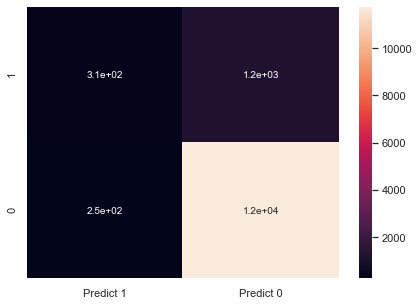

In [60]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [61]:
from sklearn.metrics import classification_report
print("Below is the class level matrices of basic logistic regression model:")

print(classification_report(y_test, y_predict))

Below is the class level matrices of basic logistic regression model:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.20      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564



In [62]:
df_cm

,Predict 1,Predict 0
1,312,1239
0,251,11762


In [63]:
Precision=df_cm.loc['1','Predict 1']/(df_cm.loc['1','Predict 1']+df_cm.loc['0','Predict 1'])
Precision

0.5541740674955595

In [64]:
Recall=df_cm.loc['1','Predict 1']/(df_cm.loc['1','Predict 1']+df_cm.loc['1','Predict 0'])
Recall

0.2011605415860735

In [65]:
Specificity=df_cm.loc['0','Predict 0']/(df_cm.loc['0','Predict 0']+df_cm.loc['0','Predict 1'])
Specificity

0.979105968534088

In [66]:
Accuracy=(df_cm.loc['0','Predict 0']+df_cm.loc['1','Predict 1'])/X_test.shape[0]
Accuracy

0.8901503981126512

In [67]:
F1_score=(2*Precision*Recall)/(Precision+Recall)
F1_score

0.29517502365184484

### The confusion matrix

True Positives (TP): we correctly predicted that client subscribed a term deposit 312

True Negatives (TN): we correctly predicted that they did not client subscribed a term deposit 11762

False Positives (FP): we incorrectly predicted term deposit (a "Type I error") 251 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted no term deposit (a "Type II error") 1239 Falsely predict negative Type II error

In [68]:
Evaluation = pd.DataFrame(columns=['Model_Name','Model_Score', 'Accuracy','Precision', 'Recall','F1-score'])
#create a dataframe to store performance metrics of different models
Evaluation.loc[1] = ['Logistic base model'] + [model_score]+[Accuracy]+[Precision]+[Recall]+[F1_score]

In [69]:
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.89015,0.89015,0.554174,0.201161,0.295175


Tried to change C parameter in logistic regression model. The conlcusion is that increasing the C parameter to 10 and 100 will only boost the performance of the model slightly, while decreasing it to 0.1 and 0.01 will lower the performance slightly as well. Also, "CD Account" is an differentiating feature in the prediction model. Similarly, we can try to change "solver" and "penalty" to see if model score changes. However, this is not examplified here.


training set score of lgr1: 0.891048

test set score of lgr1: 0.890150

training set score of lgr100: 0.890890

test set score of lgr100: 0.889855

training set score of lgr10: 0.890890

test set score of lgr10: 0.889855

training set score of lgr01: 0.891111

test set score of lgr01: 0.890224

training set score of lgr001: 0.891585

test set score of lgr001: 0.891109


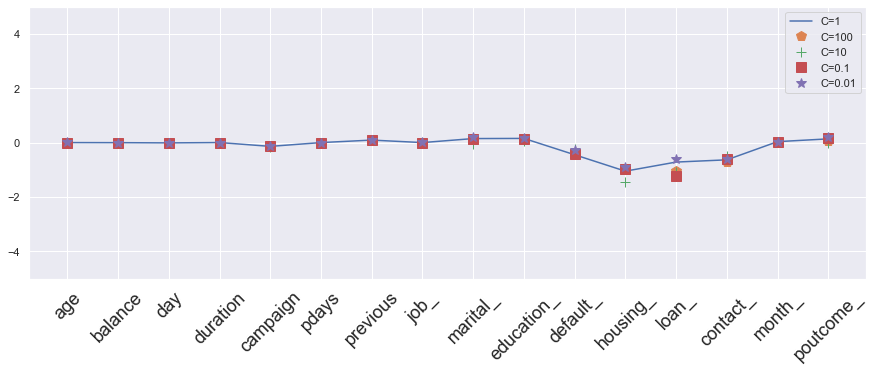

In [70]:
print('\n'"training set score of lgr1: %f" % model.score(X_train, y_train))
print('\n'"test set score of lgr1: %f" % model.score(X_test, y_test))

######increase C to 100#####
lgr100=LogisticRegression(C=100, max_iter=7000).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))

######increase C to 10#####
lgr10=LogisticRegression(C=10, max_iter=7000).fit(X_train,y_train)
print('\n'"training set score of lgr10: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr10: %f" % lgr100.score(X_test, y_test))

######decrease C to 0.1#####
lgr01=LogisticRegression(C=0.1, max_iter=7000).fit(X_train,y_train)
print('\n'"training set score of lgr01: %f" % lgr01.score(X_train, y_train))
print('\n'"test set score of lgr01: %f" % lgr01.score(X_test, y_test))

######decrease C to 0.01#####
lgr001=LogisticRegression(C=0.01, max_iter=7000).fit(X_train,y_train)
print('\n'"training set score of lgr001: %f" % lgr001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % lgr001.score(X_test, y_test))
 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(model.coef_.T,'-', markersize=10, label='C=1')
plt.plot(lgr100.coef_.T,'p',markersize=10, label='C=100')
plt.plot(lgr10.coef_.T,'+', markersize=10, label='C=10')
plt.plot(lgr01.coef_.T,'s', markersize=10, label='C=0.1')
plt.plot(lgr001.coef_.T,'*',markersize=10, label='C=0.01')
plt.xticks(range(X.shape[1]),X.columns,rotation=45, fontsize=18 )

plt.ylim(-5,5)
plt.legend()
plt.show()

In [71]:
#Looks like C=0.01 performs better than base model, so get metrics from the better model
lgr001_score = lgr001.score(X_test, y_test)
print(lgr001_score)

0.891108817457977


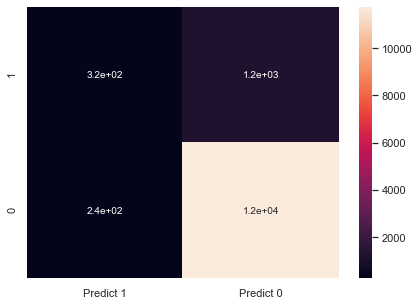

In [72]:
y_predict = lgr001.predict(X_test)
cm001=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm001 = pd.DataFrame(cm001, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm001, annot=True)

In [73]:
df_cm001

,Predict 1,Predict 0
1,318,1233
0,244,11769


In [74]:
print("Below is the class level matrices of improved logistic regression model:")

print(classification_report(y_test, y_predict))

Below is the class level matrices of improved logistic regression model:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.57      0.21      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [75]:
Prec001=df_cm001.loc['1','Predict 1']/(df_cm001.loc['1','Predict 1']+df_cm001.loc['0','Predict 1'])
Recall001=df_cm001.loc['1','Predict 1']/(df_cm001.loc['1','Predict 1']+df_cm001.loc['1','Predict 0'])
Spec001=df_cm001.loc['0','Predict 0']/(df_cm001.loc['0','Predict 0']+df_cm001.loc['0','Predict 1'])
Accu001=(df_cm001.loc['0','Predict 0']+df_cm001.loc['1','Predict 1'])/X_test.shape[0]
F1_s001=(2*Prec001*Recall001)/(Prec001+Recall001)
Evaluation.loc[2] = ['Logistic improved model'] + [lgr001_score]+[Accu001]+[Prec001]+[Recall001]+[F1_s001]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994


# Try decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [77]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [78]:
print("The actual depth of the decison tree is:", dTree.tree_.max_depth)
#Print out the actual depth of the tree

The actual depth of the decison tree is: 30


In [79]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
#score of the descison tree

1.0
0.8717929814214096


In [80]:
dTree_score=dTree.score(X_test, y_test)

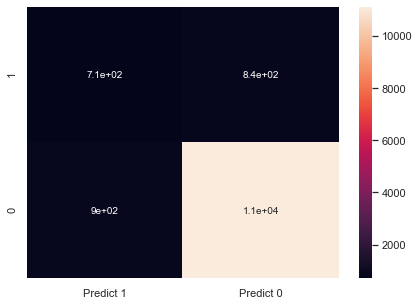

In [81]:
y_predict = dTree.predict(X_test)
cmdtree=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cmdtree = pd.DataFrame(cmdtree, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmdtree, annot=True)

In [82]:
df_cmdtree

,Predict 1,Predict 0
1,708,843
0,896,11117


In [83]:
print("Below is the class level matrices of decision tree model:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of decision tree model:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.44      0.46      0.45      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [84]:
P_dtree=df_cmdtree.loc['1','Predict 1']/(df_cmdtree.loc['1','Predict 1']+df_cmdtree.loc['0','Predict 1'])
R_dtree=df_cmdtree.loc['1','Predict 1']/(df_cmdtree.loc['1','Predict 1']+df_cmdtree.loc['1','Predict 0'])
S_dtree=df_cmdtree.loc['0','Predict 0']/(df_cmdtree.loc['0','Predict 0']+df_cmdtree.loc['0','Predict 1'])
A_dtree=(df_cmdtree.loc['0','Predict 0']+df_cmdtree.loc['1','Predict 1'])/X_test.shape[0]
F1_dtree=(2*P_dtree*R_dtree)/(P_dtree+R_dtree)
Evaluation.loc[3] = ['Basic decision tree'] + [dTree_score]+[A_dtree]+[P_dtree]+[R_dtree]+[F1_dtree]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811


In [85]:
#try entropy instead of gini to see if model store increase
dTree2 = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree2.fit(X_train, y_train)
print(dTree2.score(X_train, y_train))
print(dTree2.score(X_test, y_test))
#It doesn't seems to make a big difference

1.0
0.8765850781480389


## Reducing over fitting (Regularization)

In [86]:
for X in [1,2,3,4,5,6,7,8,9,10]:
   dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = X, random_state=1)
   dTreeR.fit(X_train, y_train)
   print(dTreeR.score(X_train, y_train))
   print(dTreeR.score(X_test, y_test))
#Set the max depth of the decision tree to be 3 - 10 and take a glimpse of the model score
#Looks like the max_detph = 7 would overall perform better than others

0.8818845388188454
0.8856531996461221
0.8887414288874143
0.8891919787673253
0.8909849274812779
0.8908876437629017
0.8944291718014346
0.8888233559422
0.9005276961481341
0.8975228546151578
0.9065630233513445
0.897670303745208
0.9108920276803488
0.8987024476555588
0.917085347742282
0.8973754054851076
0.9232470692324707
0.8972279563550575
0.9301355578727841
0.8983338248304334


In [87]:
#get the performance matrix for decision tree with a max_depth = 7
dTree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=1)
dTree2.fit(X_train, y_train)
print(dTree2.score(X_train, y_train))
dt2_score=dTree2.score(X_test, y_test)
print(dt2_score)


0.9108920276803488
0.8987024476555588


In [88]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree2.feature_importances_, columns = ["Importance"], index = X_train.columns))

            Importance
age           0.065675
balance       0.017694
day           0.025524
duration      0.519018
campaign      0.004938
pdays         0.066256
previous      0.003092
job_          0.005290
marital_      0.003453
education_    0.002828
default_      0.000000
housing_      0.024993
loan_         0.002133
contact_      0.039041
month_        0.100383
poutcome_     0.119683


0.8987024476555588


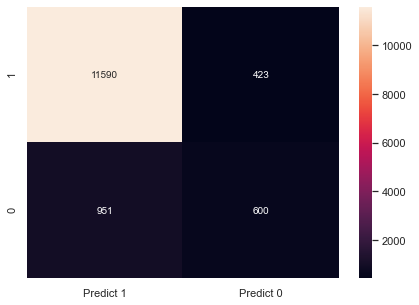

In [89]:
print(dTree2.score(X_test , y_test))
y_predict = dTree2.predict(X_test)

cmdt2=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cmdt2 = pd.DataFrame(cmdt2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmdt2, annot=True ,fmt='g')

In [90]:
df_cmdt2

,Predict 1,Predict 0
1,11590,423
0,951,600


In [91]:
print("Below is the class level matrices of decision tree model afer regularization:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of decision tree model afer regularization:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12013
           1       0.59      0.39      0.47      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [92]:
P_dt2=df_cmdt2.loc['1','Predict 1']/(df_cmdt2.loc['1','Predict 1']+df_cmdt2.loc['0','Predict 1'])
R_dt2=df_cmdt2.loc['1','Predict 1']/(df_cmdt2.loc['1','Predict 1']+df_cmdt2.loc['1','Predict 0'])
S_dt2=df_cmdt2.loc['0','Predict 0']/(df_cmdt2.loc['0','Predict 0']+df_cmdt2.loc['0','Predict 1'])
A_dt2=(df_cmdt2.loc['0','Predict 0']+df_cmdt2.loc['1','Predict 1'])/X_test.shape[0]
F1_dt2=(2*P_dt2*R_dt2)/(P_dt2+R_dt2)
Evaluation.loc[4] = ['Reduced decision tree'] + [dt2_score]+[A_dt2]+[P_dt2]+[R_dt2]+[F1_dt2]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042


## 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

### Ensemble Learning - Bagging

In [93]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


0.9042317900324388


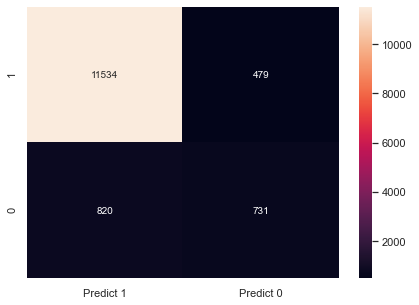

In [94]:
y_predict = bgcl.predict(X_test)
bagging_score=bgcl.score(X_test , y_test)
print(bagging_score)

cmbag=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cmbag = pd.DataFrame(cmbag, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmbag, annot=True ,fmt='g')

In [95]:
print("Below is the class level matrices of Bagging:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of Bagging:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.60      0.47      0.53      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.72      0.74     13564
weighted avg       0.90      0.90      0.90     13564



In [96]:
df_cmbag

,Predict 1,Predict 0
1,11534,479
0,820,731


In [97]:
print("Below is the class level matrices of bagging:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of bagging:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.60      0.47      0.53      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.72      0.74     13564
weighted avg       0.90      0.90      0.90     13564



In [98]:
P_bag=df_cmbag.loc['1','Predict 1']/(df_cmbag.loc['1','Predict 1']+df_cmbag.loc['0','Predict 1'])
R_bag=df_cmbag.loc['1','Predict 1']/(df_cmbag.loc['1','Predict 1']+df_cmbag.loc['1','Predict 0'])
S_bag=df_cmbag.loc['0','Predict 0']/(df_cmbag.loc['0','Predict 0']+df_cmbag.loc['0','Predict 1'])
A_bag=(df_cmbag.loc['0','Predict 0']+df_cmbag.loc['1','Predict 1'])/X_test.shape[0]
F1_bag=(2*P_bag*R_bag)/(P_bag+R_bag)
Evaluation.loc[5] = ['Ensemable_Bagging'] + [bagging_score]+[A_bag]+[P_bag]+[R_bag]+[F1_bag]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042
5,Ensemable_Bagging,0.904232,0.904232,0.933625,0.960127,0.946690


## Ensemble Learning - AdaBoosting

In [99]:
from sklearn.ensemble import AdaBoostClassifier

In [100]:
for X in [5,10,20,50,100,200,500]:
    abcl = AdaBoostClassifier(n_estimators=X, random_state=1)
    abcl = abcl.fit(X_train, y_train)
    y_predict = abcl.predict(X_test)
    print(abcl.score(X_test , y_test))
#Try changen_estimator and compare the socre, it looks like n_estimator = 200 will be good if not overfitting

0.8805662046593925
0.8849159539958714
0.8891919787673253
0.8984812739604836
0.9003243880861103
0.901135358301386
0.901135358301386


In [101]:
abcl = AdaBoostClassifier(n_estimators=200, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.901135358301386


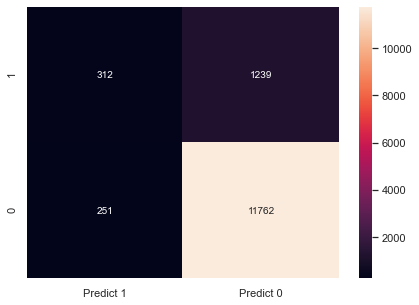

In [102]:
y_predict = abcl.predict(X_test)
ada_score=abcl.score(X_test , y_test)
print(ada_score)

cm_ada=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cmada = pd.DataFrame(cm_ada, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [103]:
df_cmada

,Predict 1,Predict 0
1,11652,361
0,980,571


In [104]:
print("Below is the class level matrices of adaBoosting:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of adaBoosting:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.61      0.37      0.46      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [105]:
P_ada=df_cmada.loc['1','Predict 1']/(df_cmada.loc['1','Predict 1']+df_cmada.loc['0','Predict 1'])
R_ada=df_cmada.loc['1','Predict 1']/(df_cmada.loc['1','Predict 1']+df_cmada.loc['1','Predict 0'])
S_ada=df_cmada.loc['0','Predict 0']/(df_cmada.loc['0','Predict 0']+df_cmada.loc['0','Predict 1'])
A_ada=(df_cmada.loc['0','Predict 0']+df_cmada.loc['1','Predict 1'])/X_test.shape[0]
F1_ada=(2*P_ada*R_ada)/(P_ada+R_ada)
Evaluation.loc[6] = ['Ensemable_AdaBoosting'] + [ada_score]+[A_ada]+[P_ada]+[R_ada]+[F1_ada]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042
5,Ensemable_Bagging,0.904232,0.904232,0.933625,0.960127,0.946690
6,Ensemable_AdaBoosting,0.901135,0.901135,0.922419,0.969949,0.945587


## Ensemble Learning - GradientBoost

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
for X in [5,10,20,50,100,200,500]:
    gbcl = GradientBoostingClassifier(n_estimators = X,random_state=1)
    gbcl = gbcl.fit(X_train, y_train)
    y_predict = gbcl.predict(X_test)
    print(gbcl.score(X_test, y_test))
##Try changen_estimator and compare the socre, it looks like n_estimator = 200 will be best if not overfitting

0.8856531996461221
0.8879386611618991
0.8956797404895311
0.9004718372161604
0.9028310232969625
0.9060749041580655
0.9059274550280153


0.9060749041580655


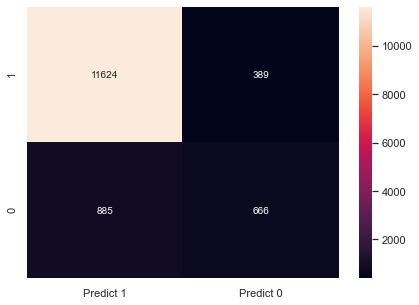

In [107]:
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
gbc1_score=gbcl.score(X_test, y_test)

print(gbcl.score(X_test, y_test))
cm_gbc=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])


df_cmgbc = pd.DataFrame(cm_gbc, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cmgbc, annot=True ,fmt='g')

In [108]:
df_cmgbc

,Predict 1,Predict 0
1,11624,389
0,885,666


In [109]:
print("Below is the class level matrices of GradientBoost:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of GradientBoost:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564



In [110]:
P_gbc=df_cmgbc.loc['1','Predict 1']/(df_cmgbc.loc['1','Predict 1']+df_cmgbc.loc['0','Predict 1'])
R_gbc=df_cmgbc.loc['1','Predict 1']/(df_cmgbc.loc['1','Predict 1']+df_cmgbc.loc['1','Predict 0'])
S_gbc=df_cmgbc.loc['0','Predict 0']/(df_cmgbc.loc['0','Predict 0']+df_cmgbc.loc['0','Predict 1'])
A_gbc=(df_cmgbc.loc['0','Predict 0']+df_cmgbc.loc['1','Predict 1'])/X_test.shape[0]
F1_gbc=(2*P_gbc*R_gbc)/(P_gbc+R_gbc)
Evaluation.loc[7] = ['Ensemable_GradientBoost'] + [gbc1_score]+[A_gbc]+[P_gbc]+[R_gbc]+[F1_gbc]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042
5,Ensemable_Bagging,0.904232,0.904232,0.933625,0.960127,0.946690
6,Ensemable_AdaBoosting,0.901135,0.901135,0.922419,0.969949,0.945587
7,Ensemable_GradientBoost,0.906075,0.906075,0.929251,0.967618,0.948047


## Ensemble RandomForest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
for X in [5,10,20,50,100,200,500]:
    rfcl = RandomForestClassifier(n_estimators = X, random_state=1,max_features=12)
    rfcl = rfcl.fit(X_train, y_train)
    y_predict = rfcl.predict(X_test)
    print(rfcl.score(X_test, y_test))
###Try changen_estimator and compare the socre, it looks like n_estimator = 200 will be best if not overfitting

0.8936154526688292
0.897670303745208
0.9037157180772634
0.9046004128575641
0.9047478619876143
0.9064435269831908
0.9053376585078148


In [112]:
for Y in [2,4,6,8,10,12,14]:
    rfcl = RandomForestClassifier(n_estimators = 200, random_state=1,max_features = Y)
    rfcl = rfcl.fit(X_train, y_train)
    y_predict = rfcl.predict(X_test)
    print(rfcl.score(X_test, y_test))
#Try change max_feature, looks like max_feature = 10 is a good option

0.9052639339427897
0.9053376585078148
0.9071070480684164
0.9068858743733412
0.9074756708935418
0.9064435269831908
0.9075493954585668


In [113]:
rfcl = RandomForestClassifier(n_estimators = 200, random_state=1,max_features=10)
rfcl = rfcl.fit(X_train, y_train)


0.9074756708935418


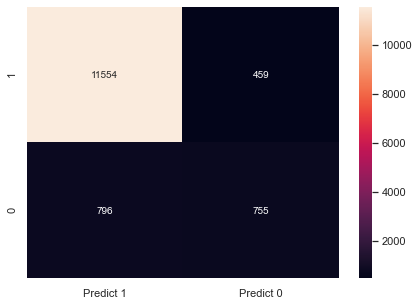

In [114]:
y_predict = rfcl.predict(X_test)
rfc1_score = rfcl.score(X_test, y_test)
print(rfc1_score)
cm_rfc=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cmrfc = pd.DataFrame(cm_rfc, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmrfc, annot=True ,fmt='g')

In [115]:
df_cmrfc

,Predict 1,Predict 0
1,11554,459
0,796,755


In [116]:
print("Below is the class level matrices of Random Forest:")
print(classification_report(y_test, y_predict))

Below is the class level matrices of Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.62      0.49      0.55      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



In [117]:
P_rfc=df_cmrfc.loc['1','Predict 1']/(df_cmrfc.loc['1','Predict 1']+df_cmrfc.loc['0','Predict 1'])
R_rfc=df_cmrfc.loc['1','Predict 1']/(df_cmrfc.loc['1','Predict 1']+df_cmrfc.loc['1','Predict 0'])
S_rfc=df_cmrfc.loc['0','Predict 0']/(df_cmrfc.loc['0','Predict 0']+df_cmrfc.loc['0','Predict 1'])
A_rfc=(df_cmrfc.loc['0','Predict 0']+df_cmrfc.loc['1','Predict 1'])/X_test.shape[0]
F1_rfc=(2*P_rfc*R_gbc)/(P_rfc+R_rfc)
Evaluation.loc[8] = ['Ensemable_RandomForest'] + [rfc1_score]+[A_rfc]+[P_rfc]+[R_rfc]+[F1_rfc]
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042
5,Ensemable_Bagging,0.904232,0.904232,0.933625,0.960127,0.946690
6,Ensemable_AdaBoosting,0.901135,0.901135,0.922419,0.969949,0.945587
7,Ensemable_GradientBoost,0.906075,0.906075,0.929251,0.967618,0.948047
8,Ensemable_RandomForest,0.907476,0.907476,0.935547,0.961791,0.954234


Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)


In [118]:
Evaluation

,Model_Name,Model_Score,Accuracy,Precision,Recall,F1-score
1,Logistic base model,0.890150,0.890150,0.554174,0.201161,0.295175
2,Logistic improved model,0.891109,0.891109,0.565836,0.205029,0.300994
3,Basic decision tree,0.871793,0.871793,0.441397,0.456480,0.448811
4,Reduced decision tree,0.898702,0.898702,0.924169,0.964788,0.944042
5,Ensemable_Bagging,0.904232,0.904232,0.933625,0.960127,0.946690
6,Ensemable_AdaBoosting,0.901135,0.901135,0.922419,0.969949,0.945587
7,Ensemable_GradientBoost,0.906075,0.906075,0.929251,0.967618,0.948047
8,Ensemable_RandomForest,0.907476,0.907476,0.935547,0.961791,0.954234


# After trying all these models with optimization of hyperparameters, Ensemble technique of Random Forest with n_estimators = 200 and max_features=10 seems to be the best model